In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#importing data from csv file to dataframe
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
#checking for missing data
missing_dict = {}
for column in train_data.columns:
    if train_data[column].isnull().sum() != 0:
        missing_dict[column] = train_data[column].isnull().sum()
print(missing_dict)  

{'LotFrontage': 259, 'Alley': 1369, 'MasVnrType': 872, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt': 81, 'GarageFinish': 81, 'GarageQual': 81, 'GarageCond': 81, 'PoolQC': 1453, 'Fence': 1179, 'MiscFeature': 1406}


In [4]:
#checking for missing data
missing_dict = {}
for column in test_data.columns:
    if test_data[column].isnull().sum() != 0:
        missing_dict[column] = test_data[column].isnull().sum()
print(missing_dict)  

{'MSZoning': 4, 'LotFrontage': 227, 'Alley': 1352, 'Utilities': 2, 'Exterior1st': 1, 'Exterior2nd': 1, 'MasVnrType': 894, 'MasVnrArea': 15, 'BsmtQual': 44, 'BsmtCond': 45, 'BsmtExposure': 44, 'BsmtFinType1': 42, 'BsmtFinSF1': 1, 'BsmtFinType2': 42, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'TotalBsmtSF': 1, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'KitchenQual': 1, 'Functional': 2, 'FireplaceQu': 730, 'GarageType': 76, 'GarageYrBlt': 78, 'GarageFinish': 78, 'GarageCars': 1, 'GarageArea': 1, 'GarageQual': 78, 'GarageCond': 78, 'PoolQC': 1456, 'Fence': 1169, 'MiscFeature': 1408, 'SaleType': 1}


In [5]:
#handling missing data

#dropping columns with too much missing data
train_data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 
                         'RoofMatl',  'BsmtUnfSF', 'BsmtHalfBath', 'GarageYrBlt',
                         '3SsnPorch', 'ScreenPorch', 'MiscVal'], inplace=True)
train_data.drop(columns=['MSSubClass', 'Street', 'Utilities', 'Condition2', 
                         'BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr', 
                          'PoolArea', 'GarageFinish'], inplace=True)

#dropping missing values
drop_list = ['Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType2']
for i in drop_list:
    train_data.dropna(subset=[i], inplace=True)

#filling in missing data 
fill_list = ['GarageType', 'GarageQual', 'GarageCond']

for i in fill_list:
    train_data[i].fillna(train_data[i].mode().iloc[0], inplace=True)
    
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace=True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean(), inplace=True)

train_data['MasVnrType'].fillna('None', inplace=True)

In [6]:
#train_data.drop(columns=['MSSubClass', 'Street', 'Alley', 'Utilities', 'Condition2', 
 #                        'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 
  #                       '3SsnPorch', 'ScreenPorch', 'PoolArea'], inplace=True)
#test_data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 
 #                        'LandSlope', 'RoofMatl', 
  #                        'BsmtUnfSF', 'BsmtFullBath', 
   #                      'BsmtHalfBath', 'FullBath', 'HalfBath', 'GarageYrBlt', 
    #                     'GarageFinish', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', 
     #                    '3SsnPorch', 'ScreenPorch',  'MiscVal'], inplace=True)

In [7]:
#handling missing data

#dropping columns
test_data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 
                        'RoofMatl', 'BsmtUnfSF', 'BsmtHalfBath', 'GarageYrBlt',
                         '3SsnPorch', 'ScreenPorch', 'MiscVal'], inplace=True)
test_data.drop(columns=['MSSubClass', 'Street', 'Utilities', 'Condition2', 
                         'BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr', 
                        'PoolArea', 'GarageFinish'], inplace=True)

#dropping missing values
drop_list = ['Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure']
for i in drop_list:
    test_data.dropna(subset=[i], inplace=True)

#filling in missing data 
fill_list = ['GarageType', 'GarageQual', 'GarageCond']

for i in fill_list:
    test_data[i].fillna(test_data[i].mode().iloc[0], inplace=True)
    
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(), inplace=True)
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean(), inplace=True)

test_data['MasVnrType'].fillna('None', inplace=True)

In [8]:
cols = {column: train_data[column].isnull().sum() for column in train_data.columns if train_data[column].isnull().sum() != 0}
print(cols)

{}


In [9]:
#print(train_data.head(10))
for column in test_data.columns:
    if test_data[column].isnull().sum() != 0:
        if test_data[column].dtype == 'object':
            test_data[column].fillna('None', inplace=True)
        else:
            test_data[column].fillna(test_data[column].mean(), inplace=True)

for column in test_data.columns:
    if test_data[column].isnull().sum() != 0:
        print(column)

In [10]:
#determining non-numerical columns
object_cols = train_data.select_dtypes(exclude='number').columns.tolist()
object_cols2 = test_data.select_dtypes(exclude='number').columns.tolist()

#for i in object_cols:
    #print(i)

#performing ordinal encoding 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_data[object_cols] = ord_encoder.fit_transform(train_data[object_cols])
test_data[object_cols2] = ord_encoder.transform(test_data[object_cols2])

#for column in train_data.columns:
    #print(train_data[column].dtypes)

In [11]:
train_features = train_data.drop(columns=['SalePrice'])
train_target = train_data['SalePrice']

#test_features = test_data.drop(columns=['SalePrice'])
#test_target = test_data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.3, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, min_samples_leaf=2, max_depth=3, random_state=42)

#model fitting and predicting
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

#calculating accuracy using rmse
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  37684.94304692101


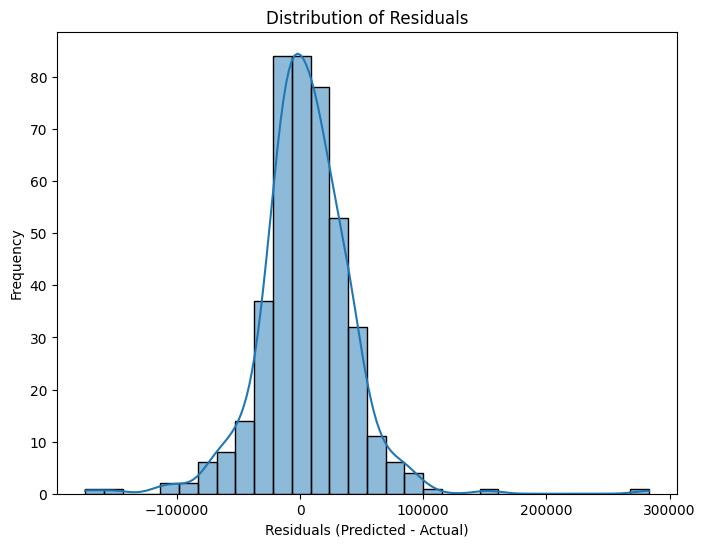

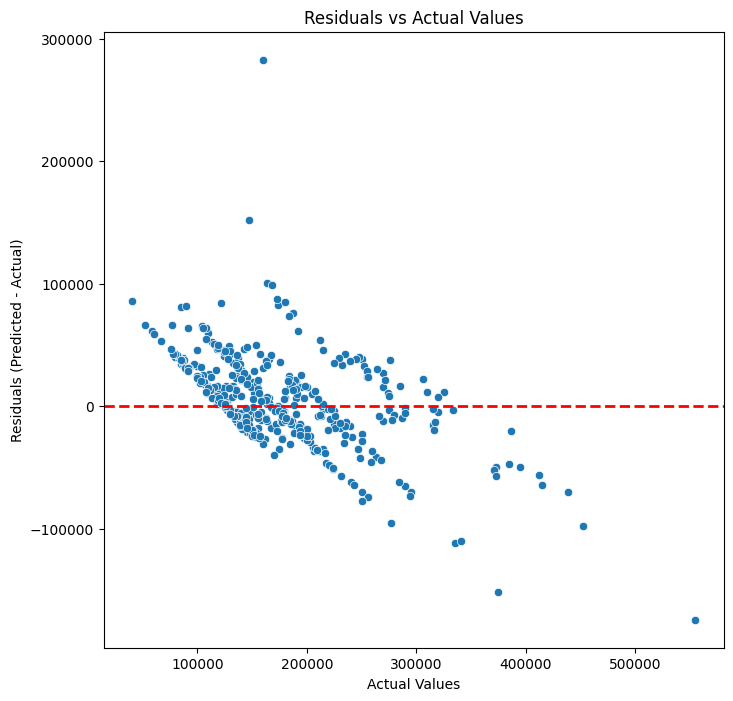

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test' contains actual values and 'predictions' contains predicted values
residuals = predictions - y_test

# Plotting a histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()

# Plotting a scatter plot of predicted vs actual values
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.show()

In [14]:
#test_id = test_data['Id']
#submission = pd.DataFrame({'Id': test_id, 'SalePrice': predictions})
#submission.to_csv('submission.csv', index=False)